In [1]:
import os, time
import numpy as np
from pandas import read_csv
from scipy.stats import zscore
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

from kshape.core import kshape, zscore

from tqdm import tqdm
from preprocessingandrecords import *
from experimentsetup import *
from plotty import *

from scipy.cluster.hierarchy import linkage

In [3]:
main_dir = "opsd-time_series-2020-10-06/"
dataset = None
for (root,dirs,files) in os.walk(main_dir):
    for f in files:
        if "60min_singleindex.csv" in f:
            dataset = read_csv(main_dir+f)
            break

l = ['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Germany', 'Denmark', 'Estonia', 'Spain', 'Great Britain', 'United Kingdom', 'Greece', 'Croatia', 'Hungary', 'Italy', 'Lithuania', 'Latvia', 'Montenegro', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Sweden', 'Slovakia', 'Ukraine']
lab = ['AT_load_actual_entsoe_transparency', 'BE_load_actual_entsoe_transparency', 'BG_load_actual_entsoe_transparency', 'CY_load_actual_entsoe_transparency',  'DE_load_actual_entsoe_transparency', 'DK_load_actual_entsoe_transparency', 'EE_load_actual_entsoe_transparency', 'ES_load_actual_entsoe_transparency',    'GB_GBN_load_actual_entsoe_transparency', 'GB_UKM_load_actual_entsoe_transparency', 'GR_load_actual_entsoe_transparency','HR_load_actual_entsoe_transparency', 'HU_load_actual_entsoe_transparency', 'IT_load_actual_entsoe_transparency', 'LT_load_actual_entsoe_transparency', 'LV_load_actual_entsoe_transparency', 'ME_load_actual_entsoe_transparency', 'NO_load_actual_entsoe_transparency','PL_load_actual_entsoe_transparency', 'PT_load_actual_entsoe_transparency', 'RO_load_actual_entsoe_transparency', 'RS_load_actual_entsoe_transparency', 'SE_load_actual_entsoe_transparency', 'SK_load_actual_entsoe_transparency', 'UA_load_actual_entsoe_transparency']
label_colors = {i:'k' for i in l}

  0%|          | 0/25 [00:00<?, ?it/s]

Timestamps: 2014-12-31T23:00:00Z, 2020-09-30T23:00:00Z


Make Distmat: 100%|██████████| 25/25 [00:04<00:00,  5.48it/s]


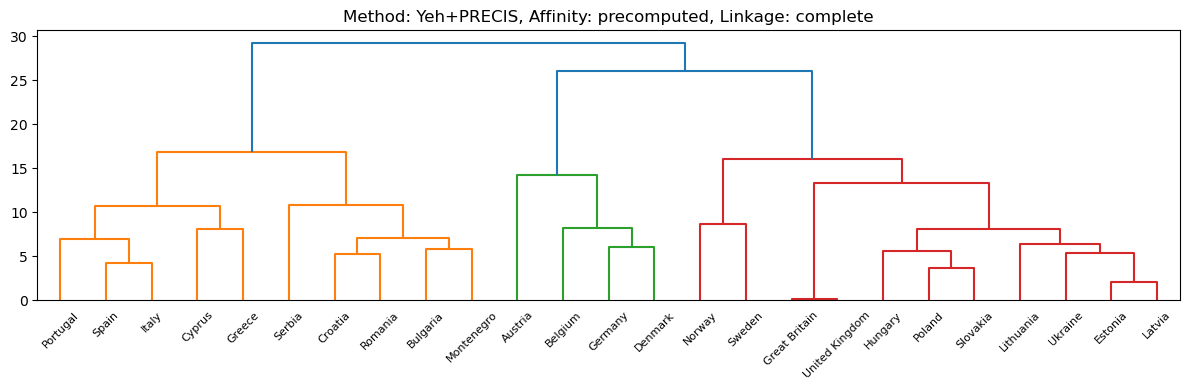

In [5]:
## YEH + PRECIS
e_PRECIS = Experiment("PRECIS", [4,24*2], algyield=True, multivariate=False, downsamplefactor=1)
a = np.array(dataset['utc_timestamp'])
print("Timestamps: {}, {}".format(a[0],a[-1]))
use_dicts = []
for lk_idx in tqdm(range(len(lab))):
    lk = lab[lk_idx]
    ts = dataset[lk]
    dat = zscore(ts,nan_policy='omit')
    d, idxs = e_PRECIS.make_exemplar(dat)
    use_dicts.append(d)
YEHPRECISdistmat = e_PRECIS.distmat_from_dicts(use_dicts)
plotty_ac(None, "Yeh+PRECIS",'precomputed', 'complete', YEHPRECISdistmat, l, label_colors)

# Random Day, Not Obvious Holiday

Make Distmat:   0%|          | 0/25 [00:00<?, ?it/s]

2017-03-03T00:00:00Z 2018-07-21T00:00:00Z 2020-02-19T00:00:00Z 2020-09-15T00:00:00Z
Timestamps: 2014-12-31T23:00:00Z, 2020-09-30T23:00:00Z


Make Distmat: 100%|██████████| 25/25 [00:04<00:00,  5.55it/s]


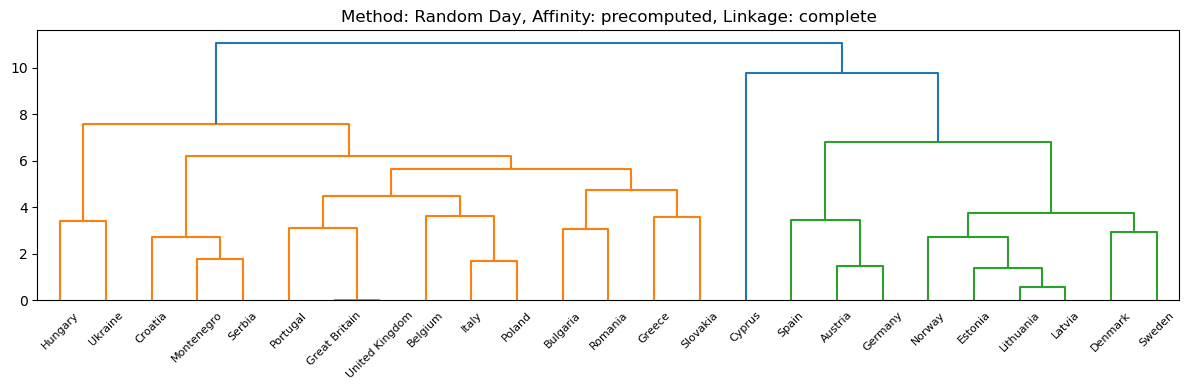

(50401, 25)


In [11]:
## Random day that is not an obvious holiday in any of the countries of interest
e_PRECIS = Experiment("PRECIS", [4,24*2], algyield=True, multivariate=False, downsamplefactor=1)
find = dataset['utc_timestamp']
DAY1 = 20001 # trying values that begin at midnight
DAY2 = 31129
DAY3 = 45001
DAY4 = 50001-8
a = np.array(dataset['utc_timestamp'])
lens = []
print("Timestamps: {}, {}".format(a[0],a[-1]))
rand_dicts = []
label_colors = {k:'k' for k in l}
for lk_idx in tqdm(range(len(lab))):
    lk = lab[lk_idx]
    dat = zscore(dataset[lk],nan_policy='omit')
    lens.append(len(dat))
    d = [dat[DAY1:DAY1+48], dat[DAY2:DAY2+48], dat[DAY3:DAY3+48], dat[DAY4:DAY4+48]]
    idxs = [(DAY1,DAY1+48), (DAY2,DAY2+48), (DAY3,DAY3+48), (DAY4,DAY4+48)]
    rand_dicts.append(d)
RANDOMDAYPRECISdistmat = e_PRECIS.distmat_from_dicts(rand_dicts)
plotty_ac(None, "Random Day",'precomputed', 'complete', RANDOMDAYPRECISdistmat, l, label_colors)

values,counts = np.unique(lens,return_counts=True)
for i in zip(values,counts):
    print(i)


# k-Shape

In [8]:
## kShape
a = np.array(dataset['utc_timestamp'])
print("Timestamps: {}, {}".format(a[0],a[-1]))
clusterts = []
numts = 0
label_colors = {k:'k' for k in l}
for lk_idx in range(len(lab)):
    lk = lab[lk_idx]
    dat = zscore(dataset[lk],nan_policy='omit')
    bad = np.where(np.isnan(dat))
    dat[bad] = np.nanmean(dat)
    clusterts.append(dat)
    numts += 1
STARTTIME = time.time()
clusters = kshape(clusterts, 4)
ENDTIME = time.time()
print("kShape Time Elapsed: {}".format(ENDTIME-STARTTIME))
c = [i[1] for i in clusters] # index 0 are the values
for j in c: # print clusters
    print(np.asarray(l)[j])

Timestamps: 2014-12-31T23:00:00Z, 2020-09-30T23:00:00Z


In [ ]:
# k = 4
#  Timestamps: 2014-12-31T23:00:00Z, 2020-09-30T23:00:00Z
# kShape Time Elapsed: 5672.544401884079
# ['Austria' 'Belgium' 'Bulgaria' 'Cyprus' 'Germany' 'Denmark' 'Estonia'
#  'Spain' 'Great Britain' 'United Kingdom' 'Greece' 'Croatia' 'Hungary'
#  'Italy' 'Lithuania' 'Latvia' 'Montenegro' 'Norway' 'Poland' 'Portugal'
#  'Romania' 'Serbia' 'Sweden' 'Slovakia' 'Ukraine']
# []
# []
# []

# Catch-22

Compute C22 Feature Vectors: 100%|██████████| 25/25 [00:43<00:00,  1.74s/it]


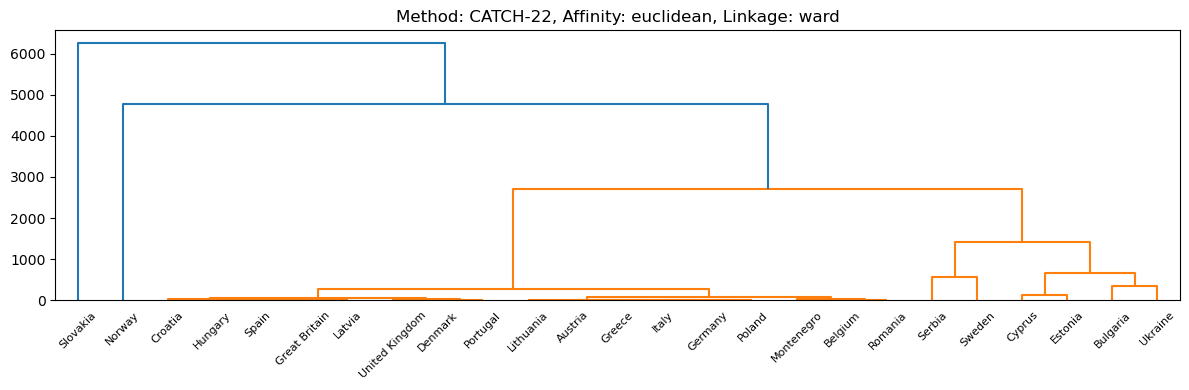

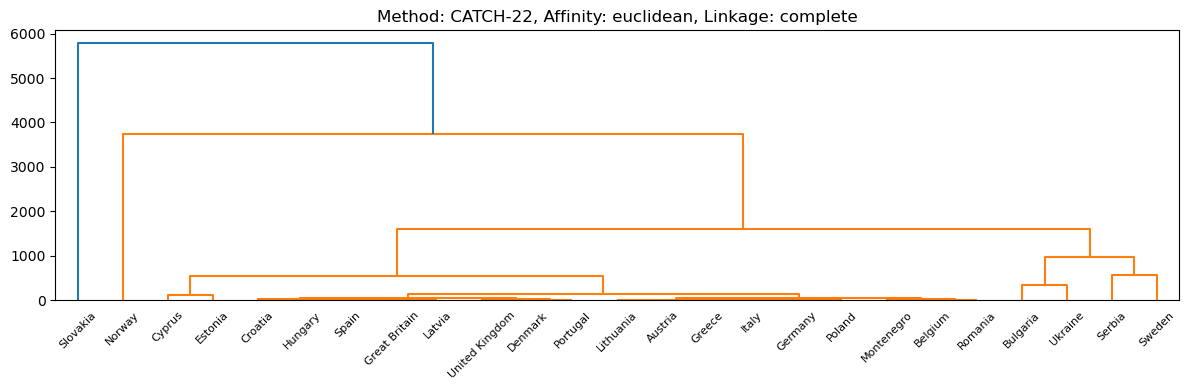

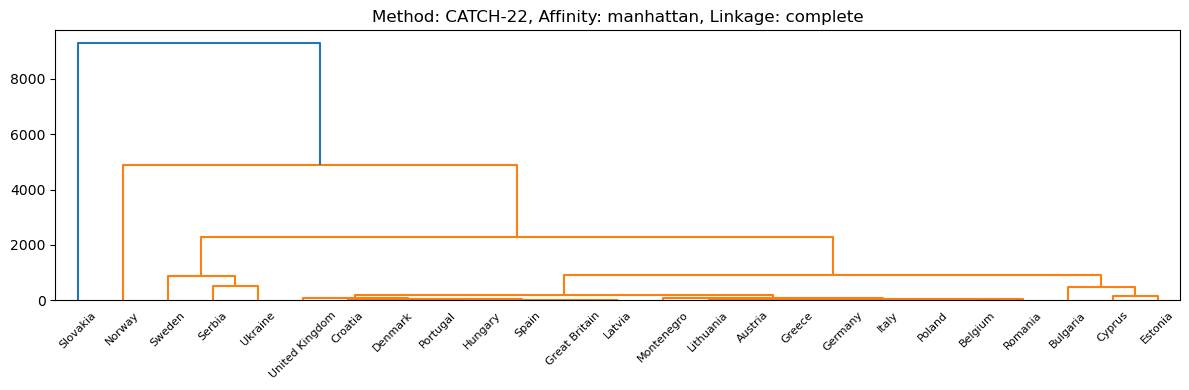

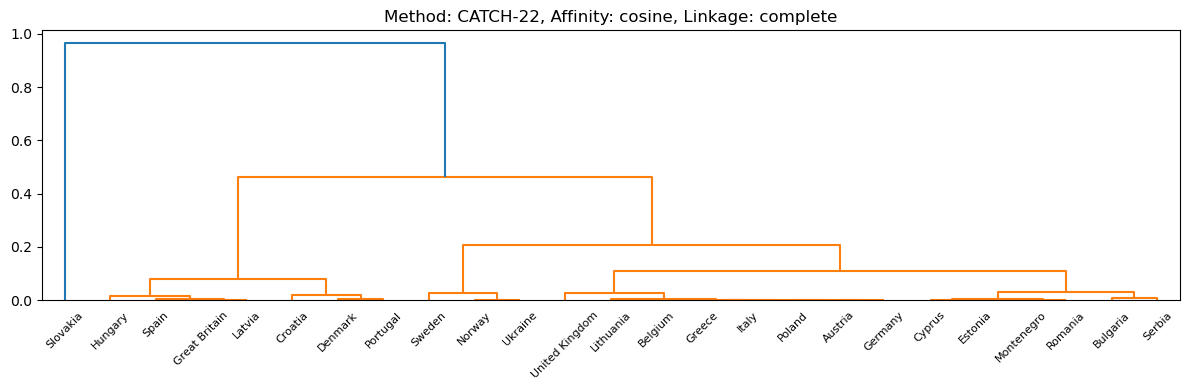

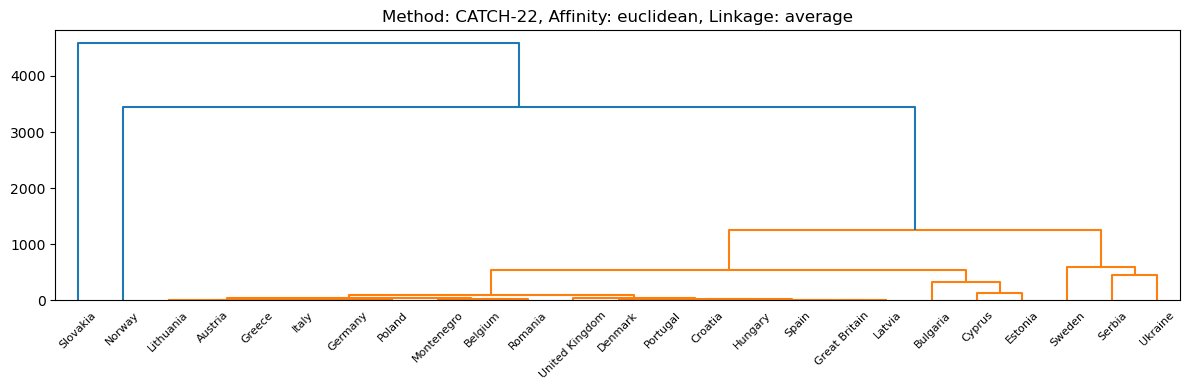

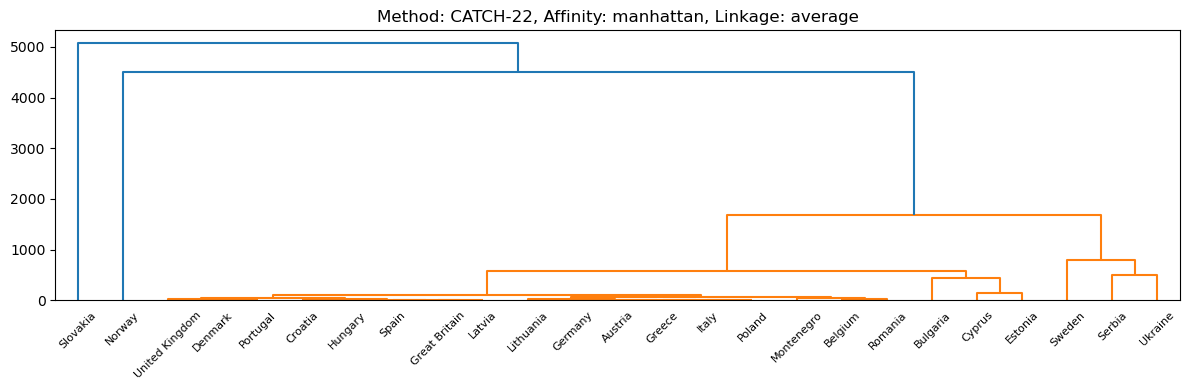

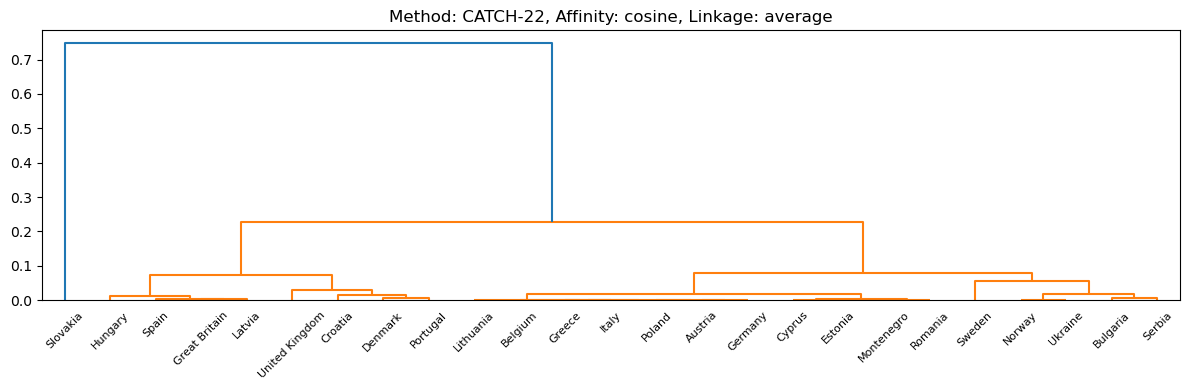

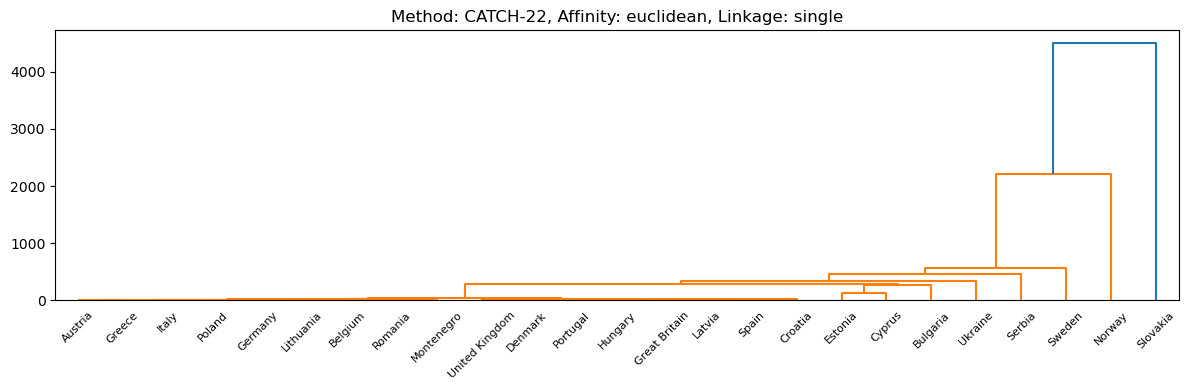

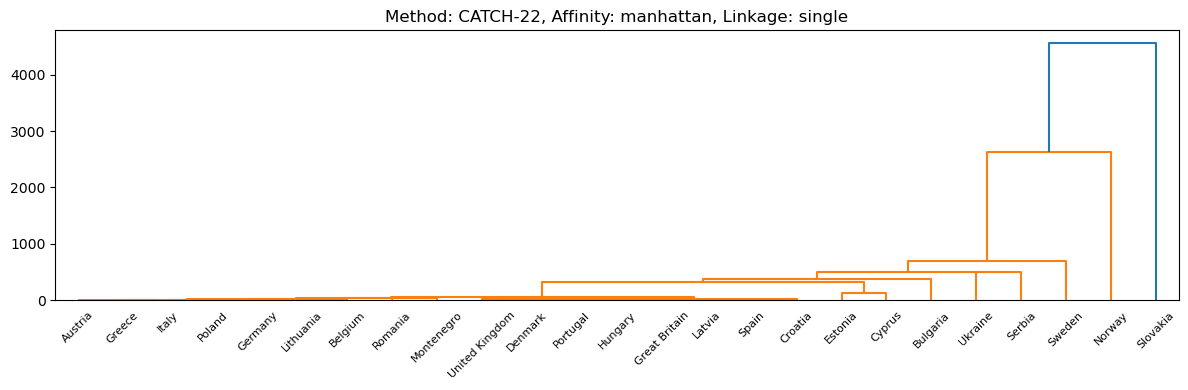

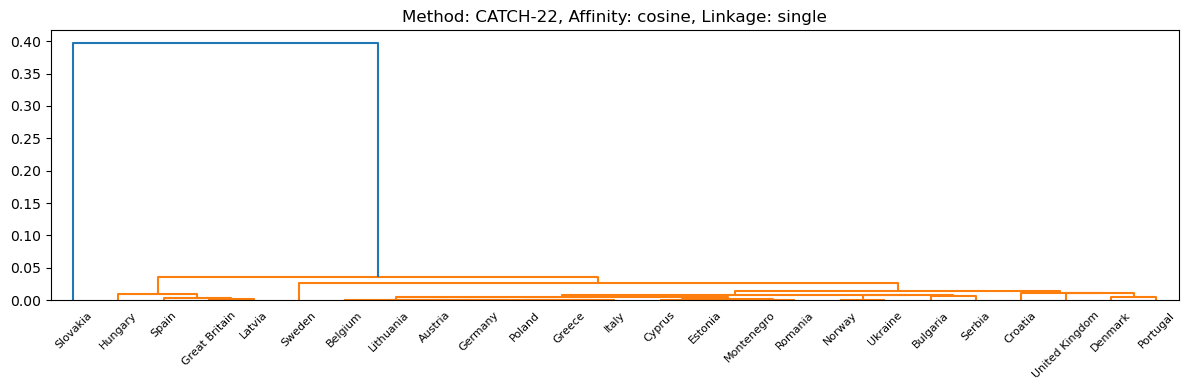

In [4]:
import catch22 # znorm internally

observationvectors = []
for lk_idx in tqdm(range(len(lab)),desc="Compute C22 Feature Vectors"):
    lk = lab[lk_idx]
    ts = dataset[lk]
    good = ~np.isnan(ts)
    bad = np.isnan(ts)
    avg = np.mean(ts[good])
    ts[bad] = avg
    ts = zscore(ts,nan_policy='omit')
    fV = catch22.catch22_all(ts)
    fV_values = np.array(fV['values'])
    observationvectors.append(fV_values)

rootsavename = "<save figures to this directory>"
linkagetypes = ['ward','complete', 'average', 'single']
affinities = ['euclidean','manhattan', 'cosine'] #l2 is also accepted, but is redundant
for linkage in linkagetypes:
    for affinity in affinities:
        if linkage == 'ward':
            # plotty_ac(rootsavename+"euclidean{}.svg".format(linkage), "CATCH-22", "euclidean", linkage, observationvectors, l, label_colors)
            plotty_ac(None, "CATCH-22", "euclidean", linkage, observationvectors, l, label_colors)
            break
        else:
            # plotty_ac(rootsavename+"{}{}.svg".format(affinity,linkage), "CATCH-22",affinity,linkage,observationvectors,l,label_colors)
            plotty_ac(None, "CATCH-22", affinity, linkage, observationvectors, l, label_colors)
